In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Histogram

In [20]:
def hist(x,no_bins):
    no_samples = np.size(x)
    x_max = max(x)
    x_min = min(x)
    bins = np.linspace(x_min,x_max,no_bins)
    bin_width = abs(bins[1] - bins[0])
    freq = np.zeros(shape=(no_bins))
    for i in range(no_samples):
        for j in range(no_bins):
            if(x[i] <= bins[j]+0.5*bin_width and x[i] > bins[j]-bin_width):
                freq[j] += 1
                break
    freq =freq/(no_samples)
    return bins,freq

In [21]:
M = 10000 # Number of samples
no_bins = 30 #Number of bins for histogram

## <font color='red'>1. Show graphically for independently generated random variable $X$ and $Y$, $$f_{xy}(x,y)=f_x(x)f_y(y).$$ </font> 
Note: Generate $X$ and $Y$ from Gaussian distribution with 0 mean and variance 1.

### Generate $X$.

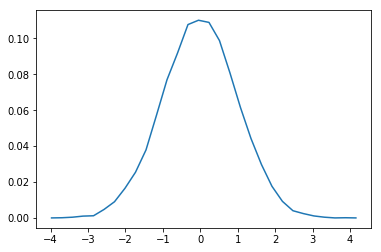

In [24]:
X = np.random.normal(0,1,M)#write code here
[x,fx]=hist(X,no_bins)
plt.figure()
plt.plot(x,fx)

### Generate $Y$.

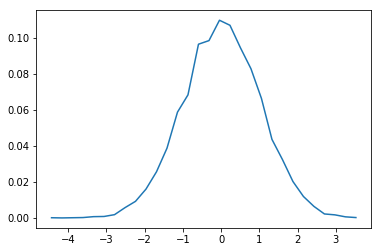

In [25]:
Y = np.random.normal(0,1,M)#write code here
[y,fy]=hist(Y,no_bins)
plt.figure()
plt.plot(y,fy)

### Now find $f_{xy}(x,y)$ using $f_x(x)$ and $f_y(y)$. 
HINT: $[f_{xy}(x,y)]_{no\_bins*no\_bins} = [f_{x}(x)]_{no\_bins \times 1} \times [f_{y}(y)]_{1\times no\_bins}$

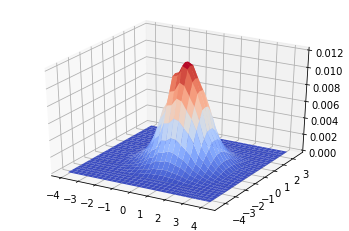

In [43]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fxy=np.transpose(np.asmatrix(fx))*np.asmatrix(fy)
x1,y1 = np.meshgrid(x,y)
surf = ax.plot_surface(x1,y1, fxy, cmap=cm.coolwarm)

### Write code for joint histogram of two variable

In [53]:
def hist2(x,y,no_bins):
#    [binsx,freq1]=hist(x,no_bins)
#    [binsy,freq2]=hist(y,no_bins)
#    freq=np.transpose(np.asmatrix(freq1))*np.asmatrix(freq2)
    no_samples = np.size(x)
    x_max = max(x)
    x_min = min(x)
    y_max = max(y)
    y_min = min(y)
    binsx = np.linspace(x_min,x_max,no_bins)
    binsy = np.linspace(y_min,y_max,no_bins)
    binx_width = abs(binsx[1] - binsx[0])
    biny_width = abs(binsy[1] - binsy[0])
    freq = np.zeros(shape=(no_bins,no_bins))
    for i in range(no_samples):
        for j in range(no_bins):
            for k in range(no_bins):
                if(x[i] <= binsx[j]+0.5*binx_width and x[i] > binsx[j]-binx_width and y[i] <= binsy[k]+0.5*biny_width and y[i] > binsy[k]-biny_width):
                    freq[j][k] += 1
                    break
    freq =freq/(no_samples)
    return binsx,binsy,freq

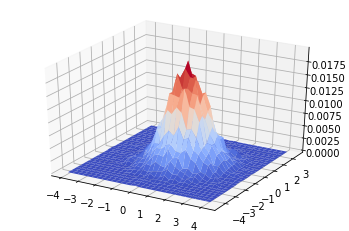

In [54]:
fig = plt.figure()
ax = fig.gca(projection='3d')
[x,y,fxy] = hist2(X,Y,no_bins)
x1,y1 = np.meshgrid(x,y)
surf = ax.plot_surface(x1,y1,fxy, cmap=cm.coolwarm)

## <font color='red'>2. Generate random variable $X$ and $Z=2X+3$. Plot $f_{xz}(x,z)$,and  $f_x(x)f_z(z)$ . X and Z are independent?</font> 


### Generate Z

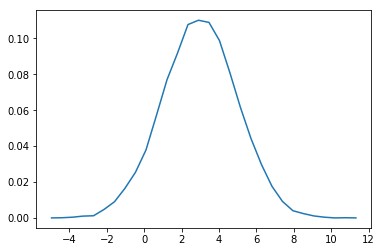

In [46]:
Z=2*X+3#write code here
[z,fz]=hist(Z,no_bins)
plt.figure()
plt.plot(z,fz)


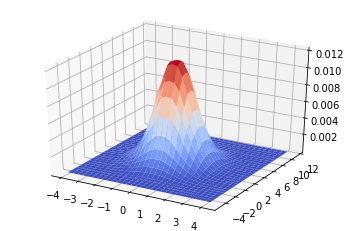

In [47]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#write code here
fxz = np.transpose(np.asmatrix(fx))*np.asmatrix(fz)#write code here
x1,z1 = np.meshgrid(x,z)
surf = ax.plot_surface(x1,z1, fxz, cmap=cm.coolwarm)

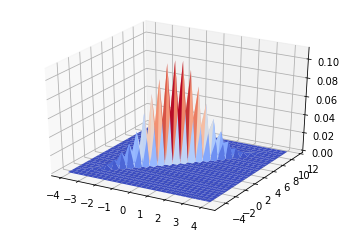

In [55]:
fig = plt.figure()
ax = fig.gca(projection='3d')
[x,z,fxz] = hist2(X,Z,no_bins)
x1,z1 = np.meshgrid(x,z)
surf = ax.plot_surface(x1,z1,fxz, cmap=cm.coolwarm)

## <font color='red'>3. If $X$ and $Y$ are uniform random variable with $-1<x,y<1$ and $Z=X+Y$, plot $f_X(x)$,$f_Y(y)$ and $f_Z(z)$.</font> 


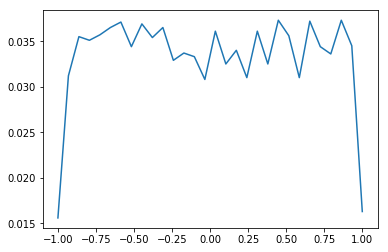

In [56]:
X = np.random.uniform(-1,1,M)#write code here
[x,fx]=hist(X,no_bins)
plt.figure()
plt.plot(x,fx)


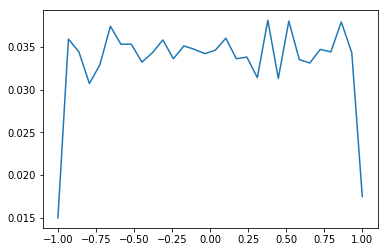

In [57]:
Y = np.random.uniform(-1,1,M) #write code here
[y,fy]=hist(Y,no_bins)
plt.figure()
plt.plot(y,fy)

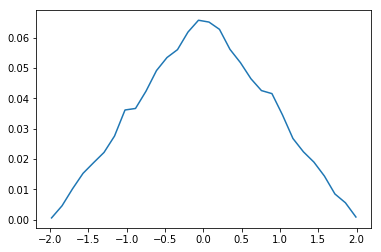

In [58]:
Z=X+Y#write code here
[z,fz]=hist(Z,no_bins)
plt.figure()
plt.plot(z,fz)